# <font color='blue'>Python Treemaps</font>

## A treemap is a chart representing data in the form of rectangles. The area or size of each rectangle corresponds to its numerical value.

## This notebook will be posted on GitHub. Check for link in tutorial notes.

# Imports

In [20]:
# go to python package index for info. and install instructions on squarify (pip install)
import squarify
import matplotlib.pyplot as plt
import numpy as np
from vega_datasets import data as vds
import pygal
# may need to install CairoSVG with pygal
# pygal may not fully work with python above 3.5

# Squarify Treemaps

In [21]:
# run cell to see plot information/arguments
squarify.plot?

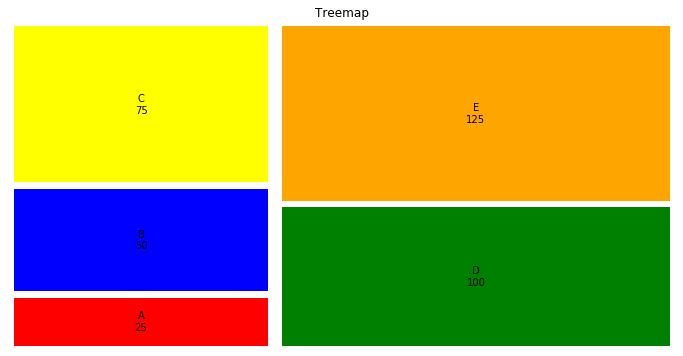

In [22]:
plt.figure(figsize=(12,6))
squarify.plot(sizes=[25,50,75,100,125],
              color=['red','blue','yellow','green','orange'],
              label=['A\n25','B\n50','C\n75','D\n100','E\n125'],
              pad=True)

plt.title('Treemap')
plt.axis('off');
# ; gets rid of extra text
# some IDEs/text editors may require plt.show()

In [23]:
# data
cars = vds.cars()
cars.tail()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
401,15.6,4,140.0,86.0,27.0,ford mustang gl,USA,2790,1982-01-01
402,24.6,4,97.0,52.0,44.0,vw pickup,Europe,2130,1982-01-01
403,11.6,4,135.0,84.0,32.0,dodge rampage,USA,2295,1982-01-01
404,18.6,4,120.0,79.0,28.0,ford ranger,USA,2625,1982-01-01
405,19.4,4,119.0,82.0,31.0,chevy s-10,USA,2720,1982-01-01


In [24]:
origin_counts = cars.groupby('Origin').size().reset_index(name='counts')
origin_counts

,Origin,counts
0,Europe,73
1,Japan,79
2,USA,254


(0.0, 100.0, 0.0, 100.0)

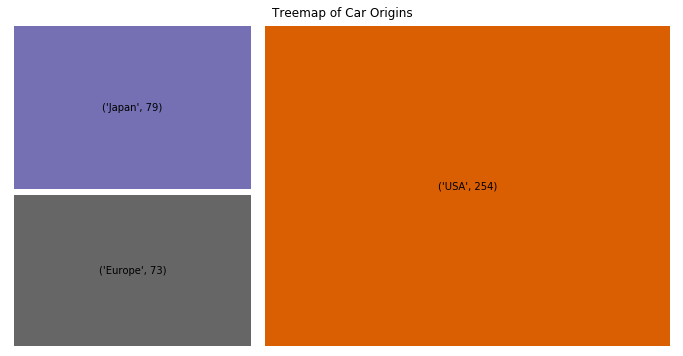

In [25]:
# plot arguments
sizes = origin_counts.counts.to_list()
np.random.seed(seed=12345)
color = plt.cm.Dark2(np.random.rand(len(sizes)))
label = list(zip(origin_counts.Origin, origin_counts.counts))

# treemap plot
plt.figure(figsize=(12,6))
squarify.plot(sizes=sizes, 
              color=color, 
              label=label, 
              pad=True)

# labels
plt.title('Treemap of Car Origins')
plt.axis('off')

# Pygal Treemaps

In [26]:
# documentation
from IPython.display import IFrame
documentation = IFrame(src='http://www.pygal.org/en/stable/documentation/types/treemap.html', width=1000, height=450)
display(documentation)

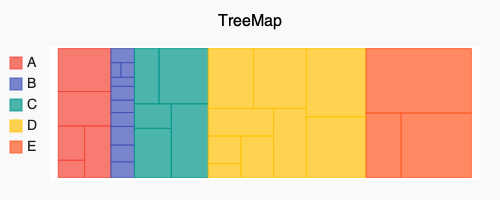

In [28]:
treemap = pygal.Treemap(width=500, height=200)
treemap.title = 'TreeMap'
treemap.add('A', [1,2,3,4,5])
treemap.add('B', np.random.rand(10))
treemap.add('C', np.random.randint(low=1, high=10, size=5))
treemap.add('D', np.arange(10))
treemap.add('E', [5, 10, 15])

In [39]:
birdstrikes = vds.birdstrikes()
birdstrikes.sort_values(by='Cost__Total_$', ascending=False).head(n=10)

,Aircraft__Airline_Operator,Aircraft__Make_Model,Airport__Name,Cost__Other,Cost__Repair,Cost__Total_$,Effect__Amount_of_damage,Flight_Date,Origin_State,Speed_IAS_in_knots,When__Phase_of_flight,When__Time_of_day,Wildlife__Size,Wildlife__Species
5424,FEDEX EXPRESS,B-727-200,AUSTIN-BERGSTROM INTL,0,7043545,7043545,Substantial,2/24/98 0:00,Texas,190.0,Climb,Dawn,Large,Unknown bird - large
3496,NORTHWEST AIRLINES,A-320,LAGUARDIA NY,762315,3049261,3811576,Substantial,9/19/95 0:00,New York,125.0,Landing Roll,Night,Large,Canada goose
8634,UPS AIRLINES,A-300,NEWARK LIBERTY INTL ARPT,0,3644483,3644483,Substantial,6/8/01 0:00,New Jersey,136.0,Approach,Dawn,Large,Canada goose
7284,US AIRWAYS*,A-320,PHILADELPHIA INTL,26727,3340917,3367644,Substantial,2/22/00 0:00,Pennsylvania,180.0,Climb,Day,Large,Canada goose
6420,UNITED AIRLINES,B-737-200,CHICAGO O'HARE INTL ARPT,0,1715077,1715077,Substantial,4/5/99 0:00,Illinois,NaN,Take-off run,Day,Medium,Red-tailed hawk
2680,UNITED AIRLINES,B-757-200,CHICAGO O'HARE INTL ARPT,1565354,0,1565354,Substantial,8/3/94 0:00,Illinois,NaN,Take-off run,Dusk,Large,Canada goose
3580,BUSINESS,DA-900,SAN FRANCISCO INTL ARPT,4574,1524631,1529205,Substantial,10/10/95 0:00,California,195.0,Climb,Dusk,Large,Unknown bird - large
1612,JAPAN AIRLINES,B-747-400,JOHN F KENNEDY INTL,0,1237569,1237569,Substantial,10/24/92 0:00,New York,NaN,Take-off run,Day,Medium,Herring gull
8377,HORIZON AIR,DHC8 DASH 8,PORTLAND INTL (OR),0,979455,979455,Substantial,3/4/01 0:00,Oregon,NaN,Climb,Day,Small,Rock pigeon
7483,AMERICAN EAGLE AIRLINES,SAAB-340,LOS ANGELES INTL,133637,668183,801820,Substantial,5/15/00 0:00,California,100.0,Take-off run,Day,Small,Rock pigeon


In [30]:
# sort birds by total cost
total_cost_by_bird = (birdstrikes.groupby('Wildlife__Species')['Cost__Total_$']
                      .sum()
                      .sort_values(ascending=False)
                      .reset_index(name='Total_Cost'))

# include only costs greater than 0
total_cost_by_bird = total_cost_by_bird[total_cost_by_bird['Total_Cost'] > 0]

total_cost_by_bird

,Wildlife__Species,Total_Cost
0,Canada goose,15389869
1,Unknown bird - large,10359212
2,Unknown bird - medium,4209607
3,Rock pigeon,3299801
4,Red-tailed hawk,2322149
5,Herring gull,1390275
6,European starling,912653
7,Unknown bird - small,607096
8,Mallard,438264
9,Turkey vulture,330271


In [40]:
# birdstrike counts by bird type (Wildlife__Species)
strike_counts_by_bird = (birdstrikes.groupby('Wildlife__Species')
                         .size()
                         .sort_values(ascending=False)
                         .reset_index(name='counts'))

strike_counts_by_bird.head()

,Wildlife__Species,counts
0,Unknown bird - small,3572
1,Unknown bird - medium,3372
2,Unknown bird or bat,629
3,Unknown bird - large,436
4,European starling,319


In [31]:
# unique
birds = total_cost_by_bird.Wildlife__Species.unique()
birds

array(['Canada goose', 'Unknown bird - large', 'Unknown bird - medium',
       'Rock pigeon', 'Red-tailed hawk', 'Herring gull',
       'European starling', 'Unknown bird - small', 'Mallard',
       'Turkey vulture', 'Mourning dove', 'American kestrel',
       'Unknown bird or bat', 'White-tailed deer', 'Cattle egret',
       'Ring-billed gull', 'Barn owl', 'Western meadowlark',
       'American robin', 'Great blue heron', 'Killdeer', 'American crow'],
      dtype=object)

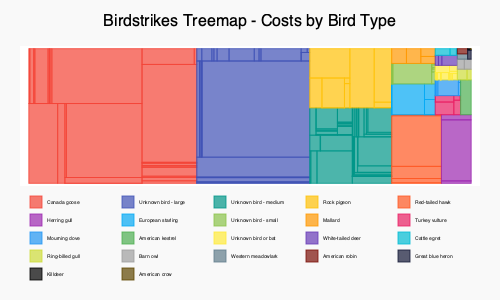

In [35]:
from pygal.style import Style
custom_style = Style(legend_font_size=5)

birds_treemap = pygal.Treemap(width=500, height=300, style=custom_style, legend_at_bottom=True)
birds_treemap.title = 'Birdstrikes Treemap - Costs by Bird Type'

for i in birds:
    # for each of the bird types matching birds in birds list variable, show total cost
    # colors indicate bird type, rectangles inside each color indicate birdstrike with damage costs
    # most birdstrikes do not have damage costs associatated
    # essentially this shows all birdstrikes with damage costs, grouped by bird type
    birds_treemap.add(i, birdstrikes[birdstrikes.Wildlife__Species == i]['Cost__Total_$'])

birds_treemap

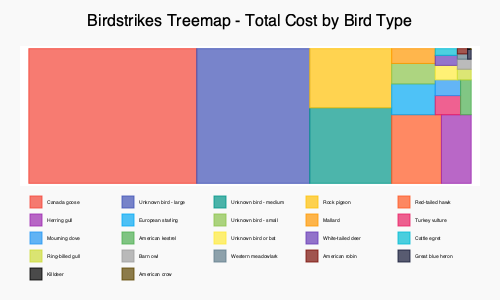

In [34]:
# another example with less detail
from pygal.style import Style
custom_style = Style(legend_font_size=5)

birds_treemap = pygal.Treemap(width=500, height=300, style=custom_style, legend_at_bottom=True)
birds_treemap.title = 'Birdstrikes Treemap - Total Cost by Bird Type'

for i in birds:
    # for each of the bird types matching birds in birds list variable, show total cost
    # colors indicate bird type
    # most birdstrikes do not have damage costs associatated
    birds_treemap.add(i, total_cost_by_bird[total_cost_by_bird.Wildlife__Species == i]['Total_Cost'])

birds_treemap

## search stack overflow for suggestions on how to add hover tooltips

In [206]:
# More Treemap Options
# Treemaps can be created with Excel
# The R language has some very nice treemap options/packages, etc.

# Waffle Chart Example
## tutorial on waffle charts coming soon

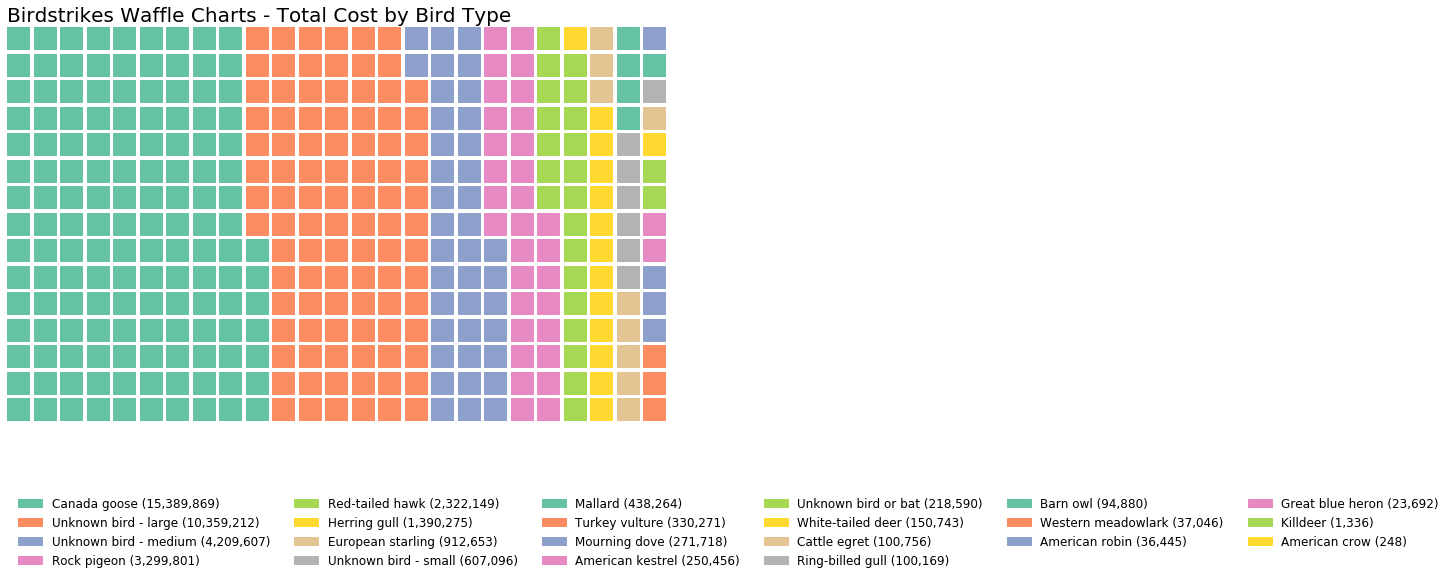

In [16]:
# waffle chart (similar to treemaps)

from pywaffle import Waffle

data = dict(zip(total_cost_by_bird.Wildlife__Species, total_cost_by_bird.Total_Cost))
fig = plt.figure(FigureClass=Waffle,
                 figsize=(18,8),
                 rows=15,
                 columns=25,
                 values=total_cost_by_bird.Total_Cost,
                 title={'label': 'Birdstrikes Waffle Charts - Total Cost by Bird Type',
                        'loc': 'left',
                        'fontdict': {'fontsize': 20}},
                 labels=["{} ({:,})".format(k, v) for k, v in data.items()],
                 legend={'loc': 'lower left',
                         'bbox_to_anchor': (0, -0.4),
                         'ncol': 6,
                         'framealpha': 0,
                         'fontsize': 12})